<P>
He took a swig of unsweetened iced tea and sat forward. “Let me put it another way. You listen to Miles Davis?” 
</P>
<P>
I worried this was a test to see if I’d followed John Coltrane down the rabbit hole. I said yes. 
</P>
<P>
“You know what they say about Miles Davis?” 
</P>
<P>
I did not.
</P>
<P>
“It’s the notes you don’t play. It’s the silences. That’s what made him so good. I need a speech with some pauses, and some quiet moments, because they say something too. You feel me?” 
</P>
<P>
By that point, I did. I knew exactly what he was talking about. What brief pride I’d felt in a speech that was in the best shape it had ever been a week ahead of time was quickly replaced by regret—regret that I’d been so consumed with making sure everything was in there that it made him complain that everything was in there. 
</P>
<P>
“Good,” he finished. “Like I said, we’re in great shape. I don’t want you to do any work tonight. I want you to go home, pour yourself a drink, and listen to some Miles Davis. And tomorrow, take another swing at it.” 
</P>
<P>
He pointed his fork at me. “Find me some silences.”
</P>
<P>
Keenan, Cody. Grace (p. 156). 

### This is a comparison between Obama and Bush on a sentence scale

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import regex as re
import os
import nltk
import plotly.express as px
from scipy.stats import mannwhitneyu, levene
import scipy

In [10]:
oba = pd.read_csv('sentence_variance_oba.csv')
gwb = pd.read_csv('sentence_variance_gwb.csv')
combined = pd.concat([oba, gwb])

In [11]:
oba.median(numeric_only=True)

depth                  5.000000
words_per_sent        17.000000
syllables_per_sent    27.000000
chars_per_sent        95.000000
char_count            76.000000
syl_count             26.000000
word_count            17.000000
char_per_word          4.382353
syl_per_word           1.473684
sent_count             1.000000
word_per_sent         17.000000
dc_word_count          6.000000
gf_word_count          2.000000
poly_word_count        2.000000
dc_word_perc           0.333333
gf_word_perc           0.105263
poly_word_perc         0.125000
ari                    8.648125
flesch_kincaid         9.362222
coleman_liau           8.074672
dale_chall            14.175524
gunning_fog           12.000000
smog                  11.208143
dtype: float64

In [12]:
gwb.median(numeric_only=True)

depth                  5.000000
words_per_sent        17.000000
syllables_per_sent    28.000000
chars_per_sent        97.000000
char_count            79.000000
syl_count             27.000000
word_count            17.000000
char_per_word          4.600000
syl_per_word           1.555556
sent_count             1.000000
word_per_sent         17.000000
dc_word_count          6.000000
gf_word_count          2.000000
poly_word_count        2.000000
dc_word_perc           0.340909
gf_word_perc           0.133333
poly_word_perc         0.148148
ari                    9.456429
flesch_kincaid        10.208000
coleman_liau           9.305455
dale_chall            14.191333
gunning_fog           12.933333
smog                  11.208143
dtype: float64

In [13]:
oba.std(numeric_only=True)

depth                  2.679265
words_per_sent        13.313618
syllables_per_sent    21.737954
chars_per_sent        75.727997
char_count            61.002663
syl_count             20.744049
word_count            13.313618
char_per_word          0.731042
syl_per_word           0.294856
sent_count             0.000000
word_per_sent         13.313618
dc_word_count          4.834241
gf_word_count          2.203185
poly_word_count        2.438401
dc_word_perc           0.130131
gf_word_perc           0.099251
poly_word_perc         0.104368
ari                    7.729727
flesch_kincaid         6.446672
coleman_liau           5.022755
dale_chall             6.676559
gunning_fog            6.679543
smog                   4.836073
dtype: float64

In [14]:
gwb.std(numeric_only=True)

depth                  2.375964
words_per_sent        10.469767
syllables_per_sent    18.370612
chars_per_sent        62.809473
char_count            51.663382
syl_count             17.680505
word_count            10.469767
char_per_word          0.750470
syl_per_word           0.287673
sent_count             0.000000
word_per_sent         10.469767
dc_word_count          4.457790
gf_word_count          2.376644
poly_word_count        2.607469
dc_word_perc           0.134221
gf_word_perc           0.103806
poly_word_perc         0.109373
ari                    6.555961
flesch_kincaid         5.518407
coleman_liau           5.213998
dale_chall             5.478525
gunning_fog            6.024451
smog                   4.693203
dtype: float64

In [15]:
((gwb.std(numeric_only=True)-oba.std(numeric_only=True))/oba.std(numeric_only=True))*100

depth                -11.320303
words_per_sent       -21.360468
syllables_per_sent   -15.490612
chars_per_sent       -17.059112
char_count           -15.309627
syl_count            -14.768304
word_count           -21.360468
char_per_word          2.657531
syl_per_word          -2.436089
sent_count                  NaN
word_per_sent        -21.360468
dc_word_count         -7.787197
gf_word_count          7.873087
poly_word_count        6.933562
dc_word_perc           3.143593
gf_word_perc           4.589053
poly_word_perc         4.795525
ari                  -15.185093
flesch_kincaid       -14.399132
coleman_liau           3.807540
dale_chall           -17.943884
gunning_fog           -9.807435
smog                  -2.954267
dtype: float64

In [16]:
fig = px.box(combined, x="source", y="words_per_sent", color="source", title="Words per Sentence: Obama vs Bush")
fig.show()

In [17]:
# Perform Levene test for equal variances for words per sentence
# H0: samples are from populations with equal variances
# H1: samples are from populations with different variances
stat, p_value = levene(oba.words_per_sent, gwb.words_per_sent, center='median')

alpha = 0.05
if p_value > alpha:
    print("With a statistic of",stat," and p-value of",round(p_value,4),"fail to reject H0)")
    print("(W = "+str(stat)+"; p = "+str(round(p_value,4))+")")
else:
    print("With a statistic of",stat," and p-value of",round(p_value,4),"there is evidence to reject H0.")
    print("(W = "+str(round(stat,3))+"; p = "+str(round(p_value,4))+")")

With a statistic of 233.56076858347149  and p-value of 0.0 there is evidence to reject H0.
(W = 233.561; p = 0.0)


In [18]:
fig = px.box(combined, x="source", y="depth", color="source", title="Parse Tree Depth: Obama vs Bush")
fig.show()

In [19]:
# Perform Levene test for equal variances for parse tree depth
# H0: samples are from populations with equal variances
# H1: samples are from populations with different variances
stat, p_value = levene(oba.depth, gwb.depth, center='median')

alpha = 0.05
if p_value > alpha:
    print("With a statistic of",stat," and p-value of",round(p_value,4),"fail to reject H0)")
    print("(W = "+str(stat)+"; p = "+str(round(p_value,4))+")")
else:
    print("With a statistic of",stat," and p-value of",round(p_value,4),"there is evidence to reject H0.")
    print("(W = "+str(round(stat,3))+"; p = "+str(round(p_value,4))+")")

With a statistic of 128.50530402012535  and p-value of 0.0 there is evidence to reject H0.
(W = 128.505; p = 0.0)


In [20]:
fig = px.box(combined, x="source", y="dale_chall", color="source", title="Dale-Chall Index: Obama vs Bush")
fig.show()

In [21]:
# Perform Levene test for equal variances for Dale-Chall readability index
# H0: samples are from populations with equal variances
# H1: samples are from populations with different variances
stat, p_value = levene(oba.dale_chall, gwb.dale_chall, center='median')

alpha = 0.05
if p_value > alpha:
    print("With a statistic of",stat," and p-value of",round(p_value,4),"fail to reject H0)")
    print("(W = "+str(stat)+"; p = "+str(round(p_value,4))+")")
else:
    print("With a statistic of",stat," and p-value of",round(p_value,4),"there is evidence to reject H0.")
    print("(W = "+str(round(stat,3))+"; p = "+str(round(p_value,4))+")")

With a statistic of 172.4330847712439  and p-value of 0.0 there is evidence to reject H0.
(W = 172.433; p = 0.0)


In [22]:
fig = px.line(oba.query('date == "2009-01-20"').words_per_sent,
             title="Words per Sentence in Obama's Inaugural speech 2009-01-20")
fig.update_layout(
    xaxis_title="sentence index",
    yaxis_title="word count")
fig.show()

In [23]:
oba.query('date == "2009-01-20"').words_per_sent.std()

15.514284981688279

In [24]:
fig = px.line(gwb.query('date == "2001-01-20"').words_per_sent,
             title="Words per Sentence in Bush's Inaugural speech 2001-01-20")
fig.update_layout(
    xaxis_title="sentence index",
    yaxis_title="word count")
fig.show()

In [25]:
gwb.query('date == "2001-01-20"').words_per_sent.median()

15.0

In [26]:
gwb.query('date == "2001-01-20"').words_per_sent.std()

7.780288859473156

In [27]:
oba.query('date == "2009-01-20"').words_per_sent.median()

19.0

In [28]:
oba.query('date == "2009-01-20"').words_per_sent.std()

15.514284981688279

<A HREF="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html">Scipy Levene test</A>

In [29]:
# Perform Levene test for equal variances.
# H0: samples are from populations with equal variances
# H1: samples are from populations with different variances
stat, p_value = levene(oba.words_per_sent, gwb.words_per_sent, center='median')

alpha = 0.05
if p_value > alpha:
    print("With a statistic of",stat," and p-value of",round(p_value,4),"fail to reject H0)")
    print("(W = "+str(stat)+"; p = "+str(round(p_value,4))+")")
else:
    print("With a statistic of",stat," and p-value of",round(p_value,4),"there is evidence to reject H0.")
    print("(W = "+str(round(stat,3))+"; p = "+str(round(p_value,4))+")")

With a statistic of 233.56076858347149  and p-value of 0.0 there is evidence to reject H0.
(W = 233.561; p = 0.0)


In [30]:
oba_wps = oba.query('date == "2009-01-20"').words_per_sent
gwb_wps = gwb.query('date == "2001-01-20"').words_per_sent

<P><A HREF="https://www.scribbr.com/apa-style/numbers-and-statistics/">APA guide for numbers and statistics</A>
</P>
<P><A HREF="https://www.scribbr.com/statistics/test-statistic/">Reporting test statistics</A>
</P>

In [31]:
# Mann-Whitney U test
stat, p_value = mannwhitneyu(oba_wps, gwb_wps)

alpha = 0.05
if p_value > alpha:
    print("With a statistic of",stat," and p-value of",round(p_value,4),"fail to reject H0)")
    print("(U = "+str(stat)+"; p = "+str(round(p_value,4))+")")
else:
    print("With a statistic of",stat," and p-value of",round(p_value,4),"there is evidence to reject H0.")
    print("(U = "+str(stat)+"; p = "+str(round(p_value,4))+")")

With a statistic of 6205.0  and p-value of 0.0413 there is evidence to reject H0.
(U = 6205.0; p = 0.0413)


In [32]:
stat

6205.0

In [33]:
p_value

0.04126296425883873

<Axes: ylabel='Frequency'>

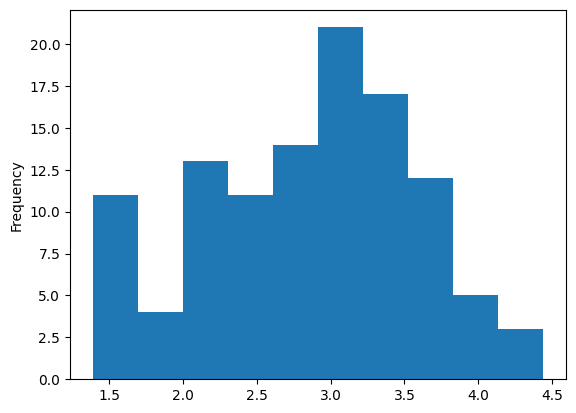

In [34]:
np.log(oba_wps).plot.hist()